
# Slider Demo


Using the slider widget to control visual properties of your plot.

In this example, a slider is used to choose the frequency of a sine
wave. You can control many continuously-varying properties of your plot in
this way.



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy.integrate import odeint # Scipy integrate is for numerical integration odeint is self explaining

In [37]:
# Update the values to plot
def update(val):
    pos=odeint(func,n0,t)
    l1.set_ydata(pos.T[0])
    l2.set_ydata(pos.T[1])
    l3.set_ydata(pos.T[2])
    fig.canvas.draw_idle()
# Reset the parameters
def reset(event):
    sfreq.reset()
    samp.reset()
#    
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
#
def func(n,t):
    s,i,r=n
    a=sinf.val      # rate of infection
    b=srec.val      # rate of recovery
    c=ssus.val      # rate of suszeptibility
    d=svac.val      # rate of vaccination
    # here you enter the differential equation system
    dsdt=-a*s*i+c*r-d*s
    didt=a*s*i-b*i
    drdt=b*i-c*r+d*s
    #
    return dsdt,didt,drdt

In [40]:
# here you integrate the DE and make a side by side plot
#starttime=time.time()
eps=0.1
n0=[1.0-eps,eps,0.]
t=np.linspace(0,10,100000)  # We do 10000 steps in the iterval [0,100]
pos=odeint(func,n0,t) # Integrate the system of differential equations
#endtime=time.time()
#print("{} s".format(endtime-starttime))

<IPython.core.display.Javascript object>


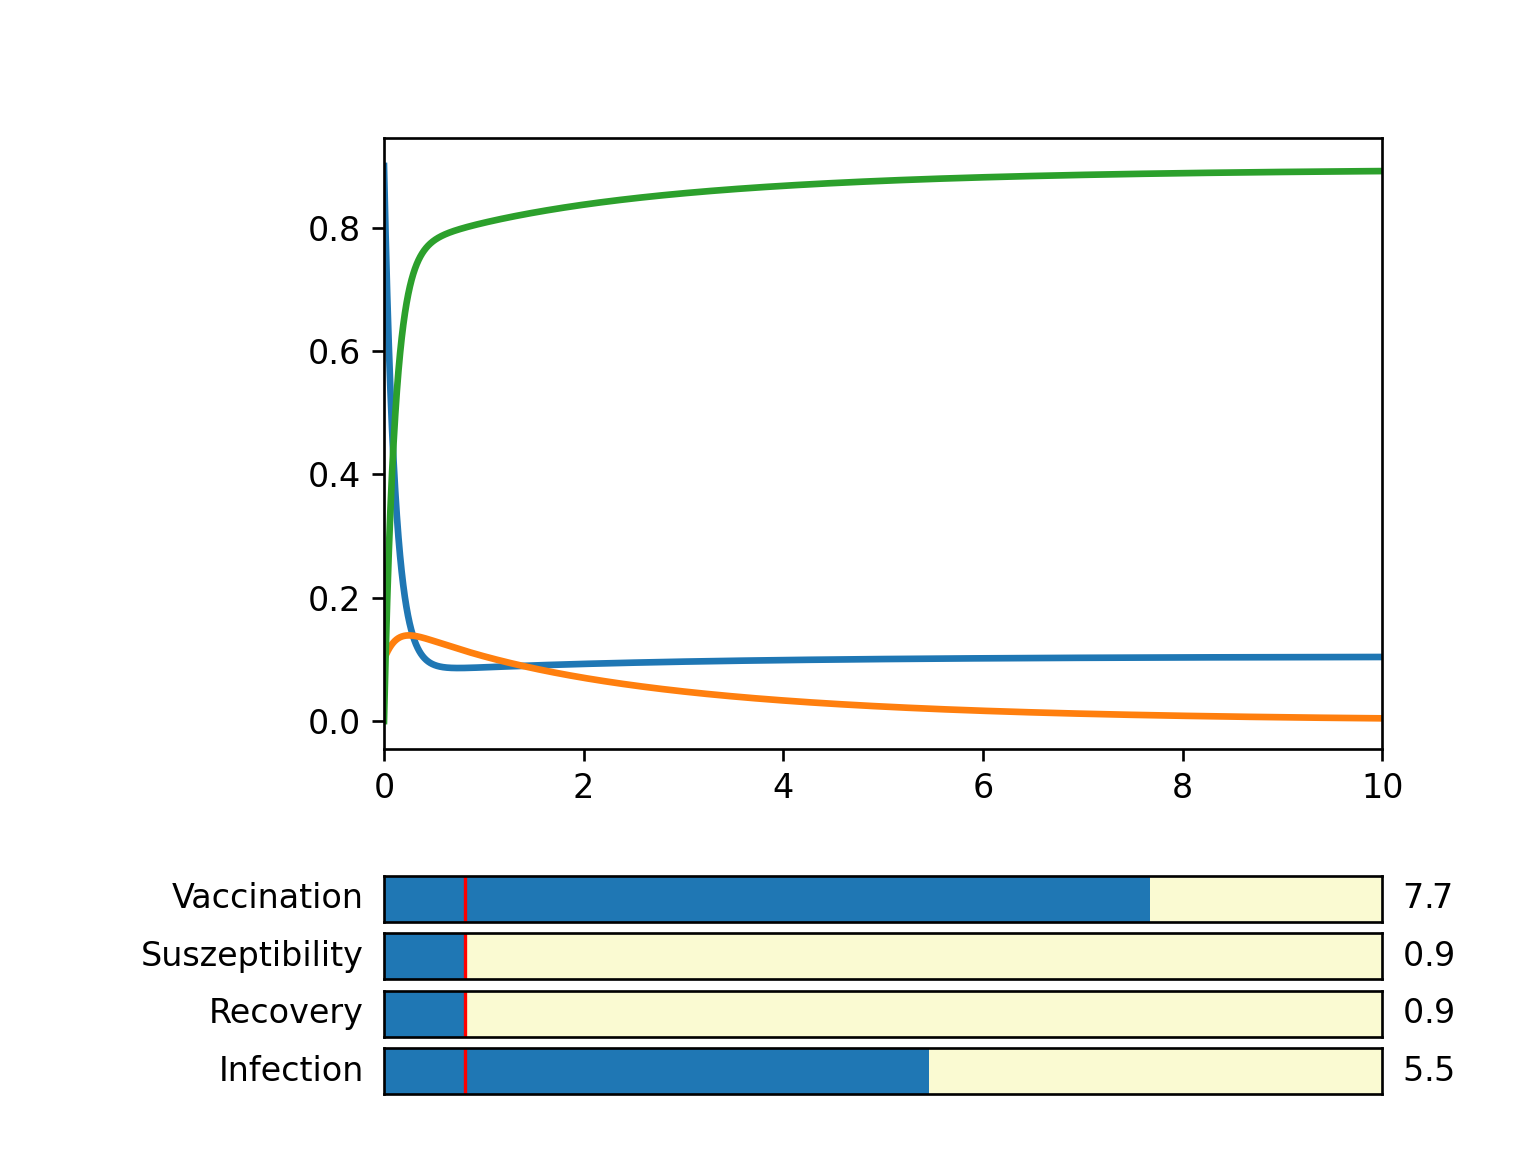

In [42]:
%matplotlib notebook
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.35)
#
s=pos.T[0]
i=pos.T[1]
r=pos.T[2]
#
l1, = plt.plot(t,s, lw=2)
l2, = plt.plot(t,i, lw=2)
l3, = plt.plot(t,r, lw=2)
#ax.plot(t,s,lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
#axfreq = plt.axes([0.25, 0.1, 0.65, 0.04], facecolor=axcolor)
#axamp = plt.axes([0.25, 0.15, 0.65, 0.04], facecolor=axcolor)
axinf = plt.axes([0.25, 0.05, 0.65, 0.04], facecolor=axcolor)
axrec = plt.axes([0.25, 0.1, 0.65, 0.04], facecolor=axcolor)
axsus = plt.axes([0.25, 0.15, 0.65, 0.04], facecolor=axcolor)
axvac = plt.axes([0.25, 0.2, 0.65, 0.04], facecolor=axcolor)
# Define a slider for the frequency
sinf = Slider(axinf, 'Infection', 0.1, 10.0, valinit=1.0, valstep=0.2)
srec = Slider(axrec, 'Recovery', 0.1, 10.0, valinit=1.0, valstep=0.2)
ssus = Slider(axsus, 'Suszeptibility', 0.1, 10.0, valinit=1.0, valstep=0.2)
svac = Slider(axvac, 'Vaccination', 0.1, 10.0, valinit=1.0, valstep=0.2)
#sfreq = Slider(axfreq, 'Frequenz', 0.1, 30.0, valinit=fini, valstep=delta_f)
# Define a slider for the amplitude
#samp = Slider(axamp, 'Amplitude', 0.1, 10.0, valinit=aini)
#
sinf.on_changed(update)
srec.on_changed(update)
ssus.on_changed(update)
svac.on_changed(update)
#samp.on_changed(update)
#
#resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
#button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
#button.on_clicked(reset)
# This is just for colouring the curves
#rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
#radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)
#radio.on_clicked(colorfunc)


plt.show()

In [4]:
t.shape

(1000,)

In [35]:
srec.val

3.9000000000000004